In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('train.csv')

In [4]:
# Display basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df.shape

(550068, 12)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
# Check for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


##### See the columns Product_Category_2 has 173638 and Product_Category_3 has 383247 missing values .
This simply means that many users didn't purchase Product_Category_2 and Product_Category_3 so we gonna fill the missing values with **mode**.


In [8]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22380\3816241353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22380\3816241353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Missing values in each column:
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [ ]:
# Basic statistics
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


### Univariate Analysis
### Distribution of Purchase Amount

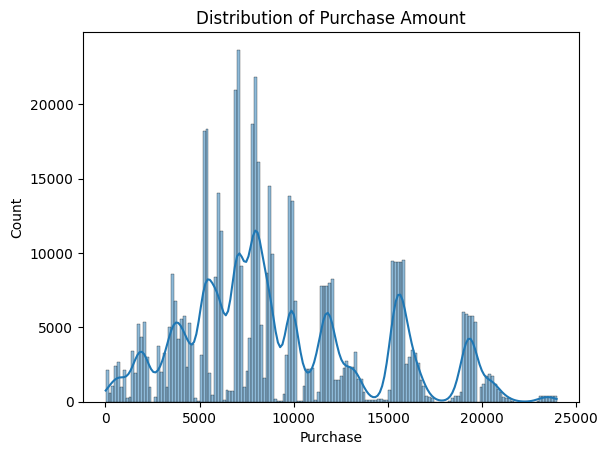

In [ ]:

sns.histplot(df['Purchase'], kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()


##### Insights :-
1. Most customers spend between Rs5000 - Rs15000
2. The distribution we got is **right-skewed**, meaning a few customers make very high purchases.

### Gender Distribution 


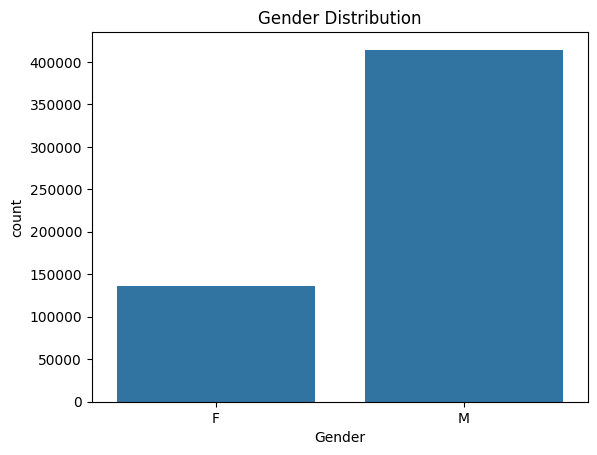

In [15]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()
##### Insights :- Dataset has more male buyers than female buyers.


### Age Group Distribution

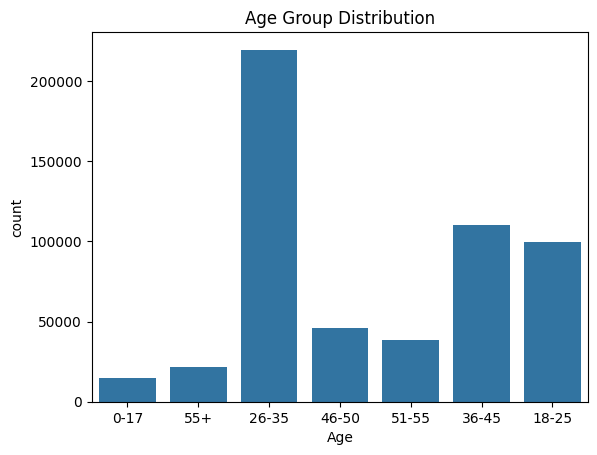

In [ ]:
sns.countplot(x='Age', data=df)
plt.title("Age Group Distribution")
plt.show()
##### Insights :- Majority of buyers are in the age group of 26-35 years.

### City Category Distribution

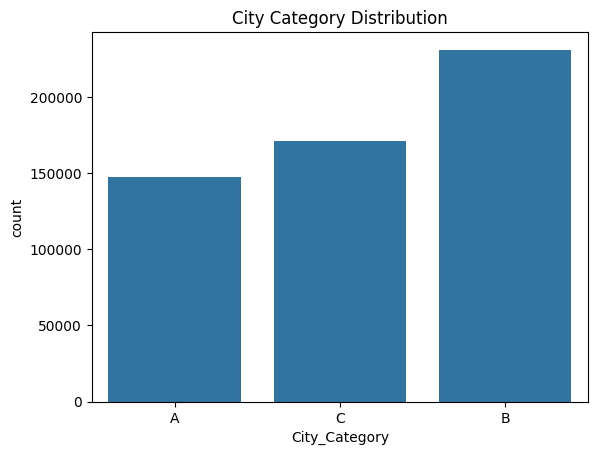

In [17]:
sns.countplot(x='City_Category', data=df)
plt.title("City Category Distribution")
plt.show()
##### Insights :- Majority of buyers are from City Category C.

## Bivariate Analysis

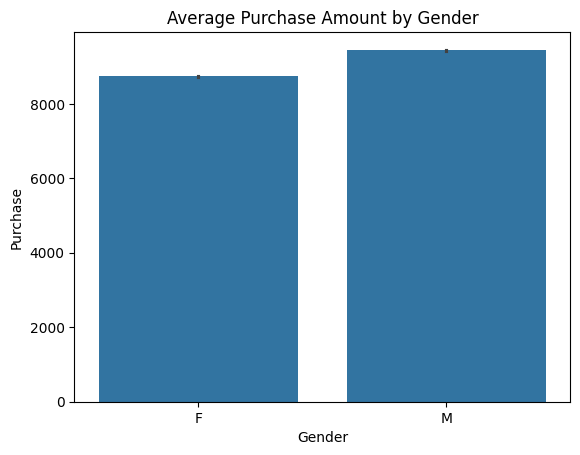

In [18]:
## Gender vs Purchase Amount
sns.barplot(x='Gender', y='Purchase', data=df, estimator='mean')
plt.title("Average Purchase Amount by Gender")
plt.show()

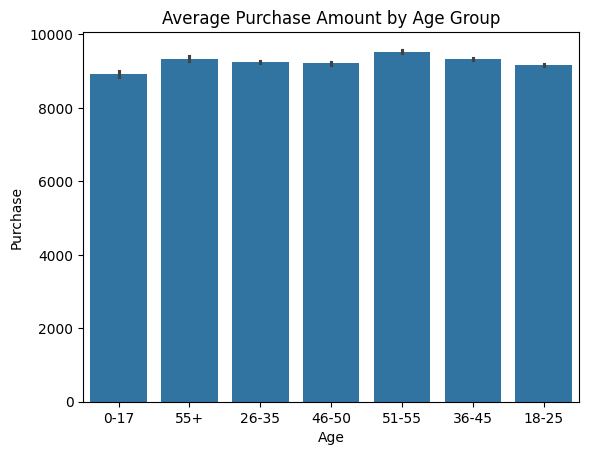

In [ ]:
## Age vs Purchase Amount
sns.barplot(x='Age', y='Purchase', data=df, estimator='mean')
plt.title("Average Purchase Amount by Age Group")
plt.show()

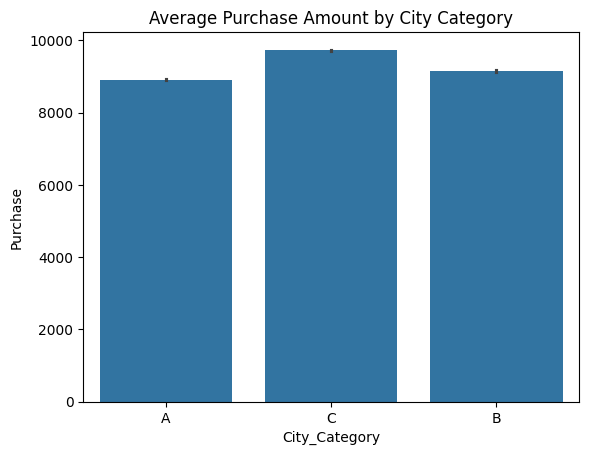

In [ ]:
## City Category vs Purchase Amount
sns.barplot(x='City_Category', y='Purchase', data=df, estimator='mean')
plt.title("Average Purchase Amount by City Category")
plt.show()

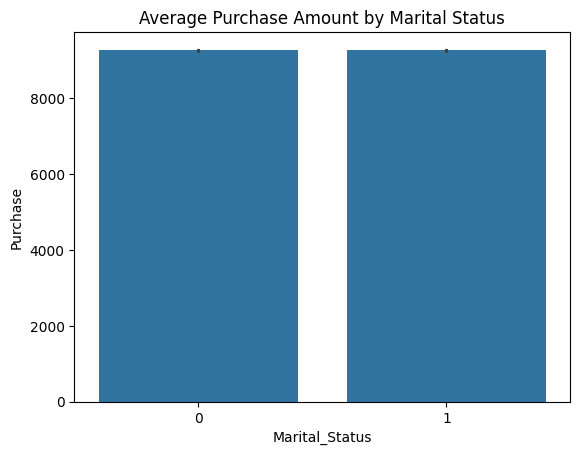

In [ ]:
## Marital Status vs Purchase Amount
sns.barplot(x='Marital_Status', y='Purchase', data=df, estimator='mean')
plt.title("Average Purchase Amount by Marital Status")
plt.show()


### Correlation

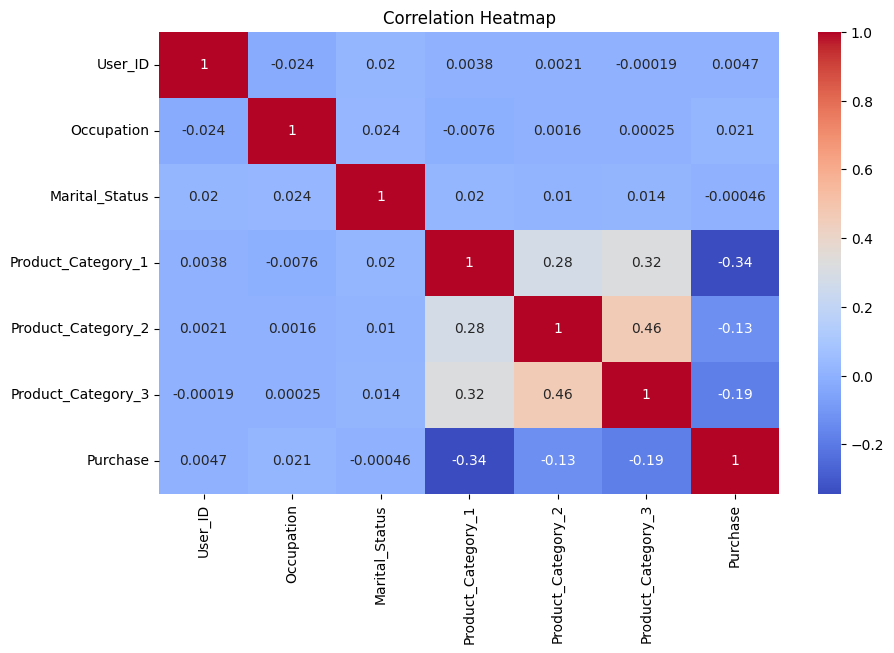

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
